In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [2]:
# Reiniciando a semente do gerador PN.
seed = 42
np.random.seed(seed)

In [3]:
# Criando um conjunto de dados para regressão polinomial.
N = 100

# Attribute.
x = 3*np.random.rand(N, 1) - 1.5
# Second order polynomial.
y = 1.5*x**4 + x**3 + 0.5*x**2 + x + 2
# Noise.
w = np.random.randn(N, 1)
# Observable function.
y_noisy = y + w

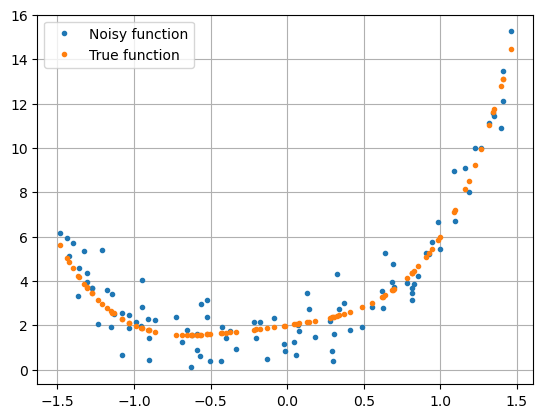

In [4]:
plt.figure()
plt.plot(x, y_noisy, '.', label='Noisy function')
plt.plot(x, y, '.', label='True function')
plt.legend()
plt.grid()
plt.show()

Tamanho do conjunto de validação: 20
Tamanhos dos conjuntos de treinamento: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80]


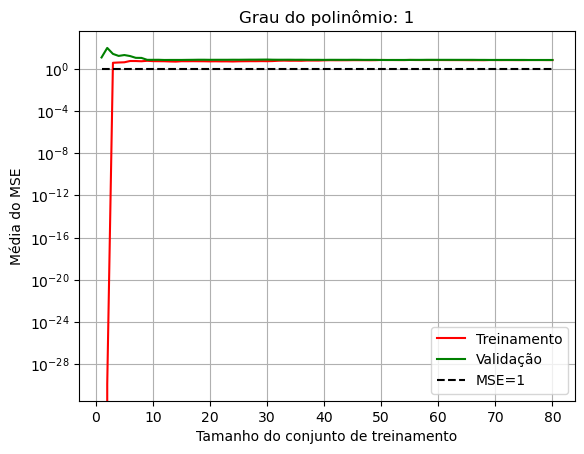

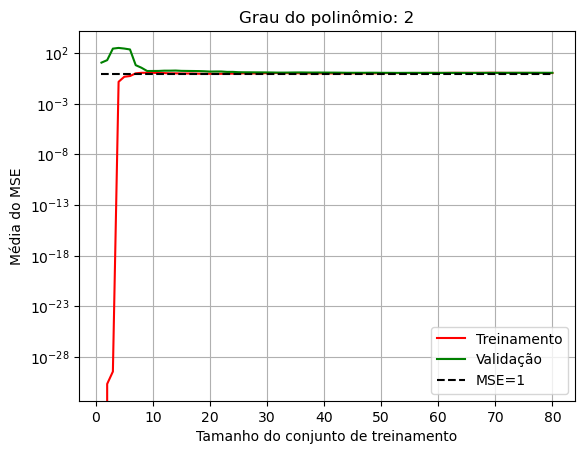

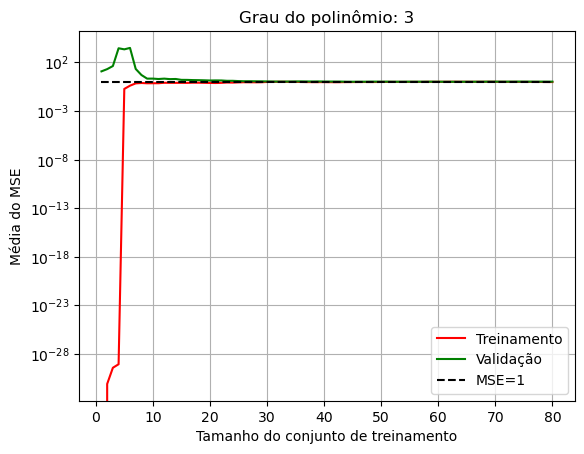

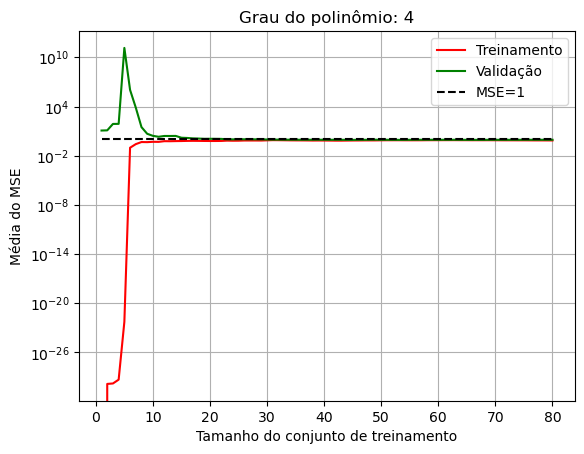

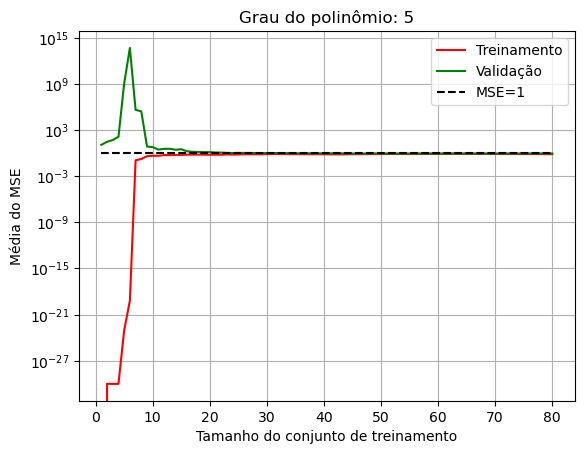

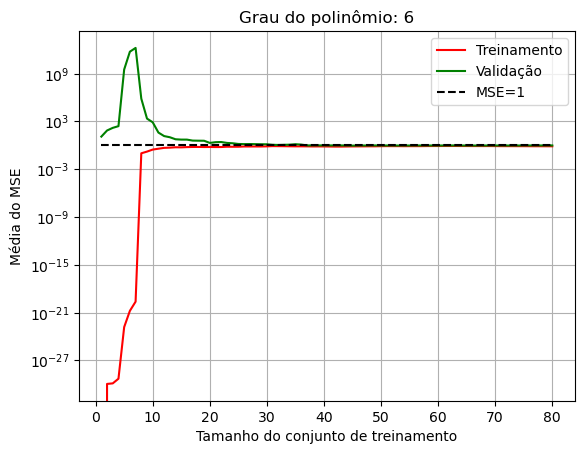

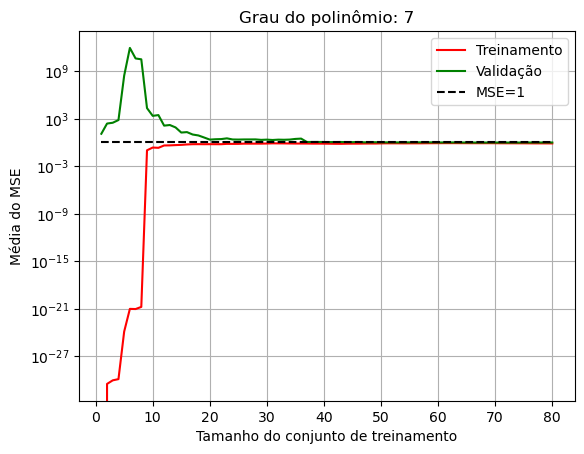

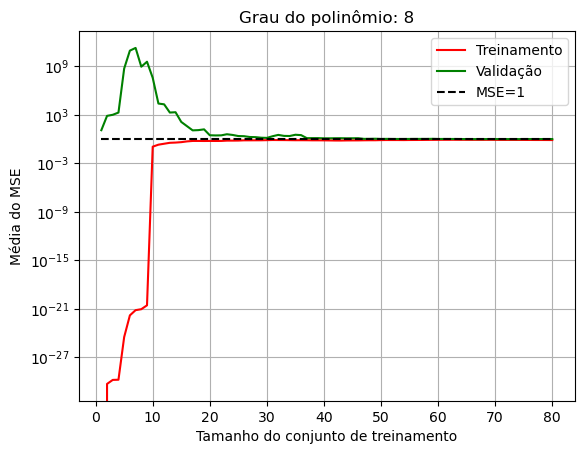

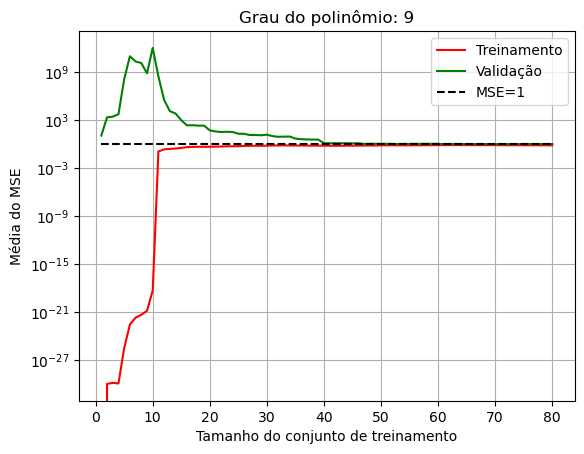

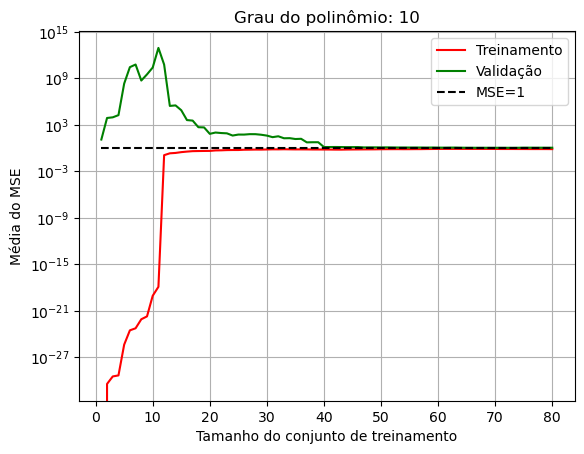

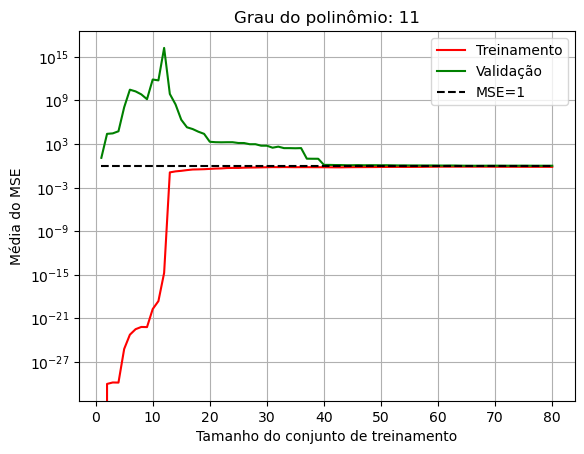

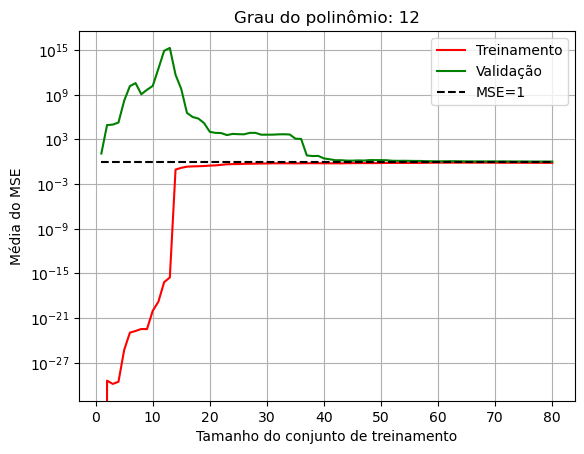

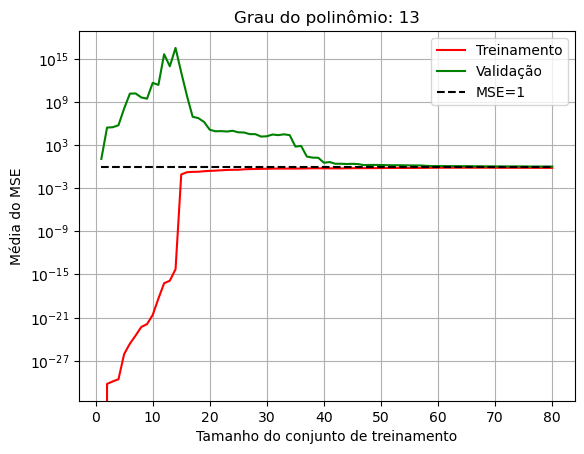

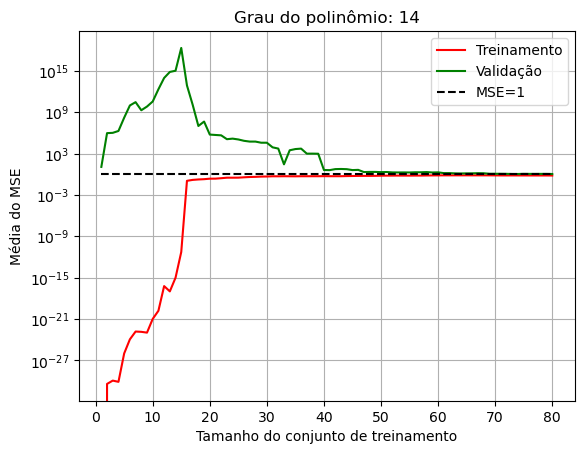

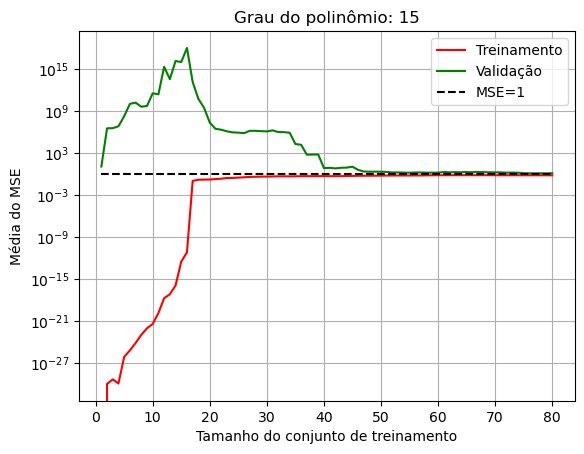

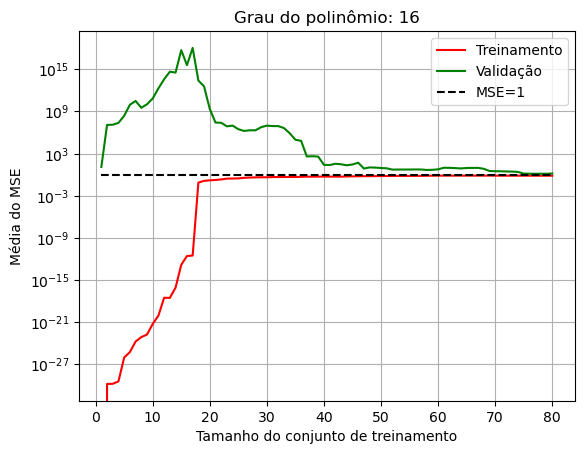

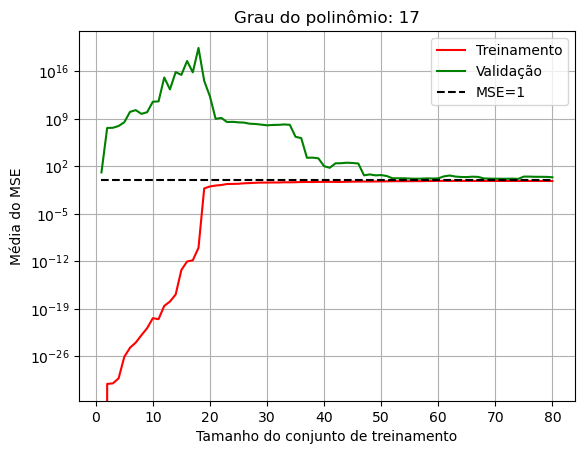

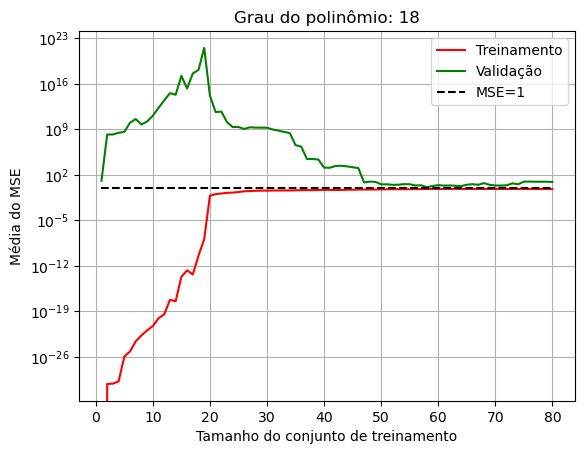

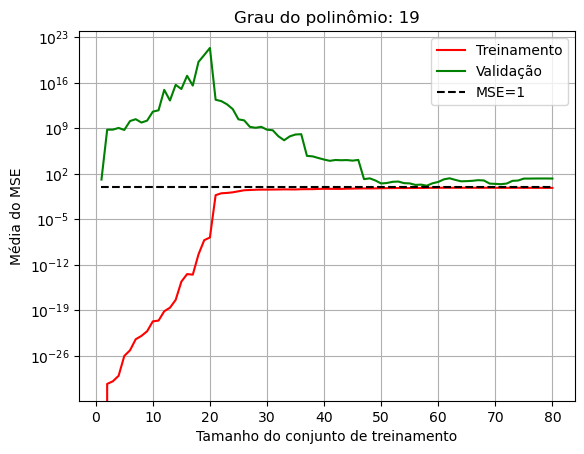

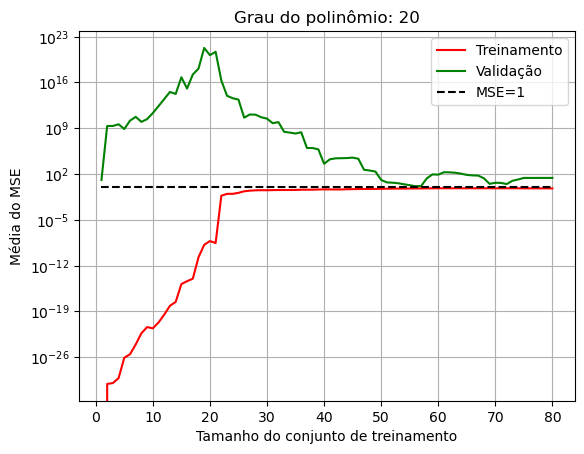

In [5]:
# Definindo o grau máximo do polinômio e um intervalo de valores para número de amostras de treinamento
max_degree = 20
train_sizes = np.linspace(1, 80, 80, dtype=int)
print('Tamanho do conjunto de validação:', 20)
print('Tamanhos dos conjuntos de treinamento:', train_sizes)

# Criando uma função para plotar as curvas de aprendizado.
def plot_learning_curves(estimator, X, y_noisy, train_sizes, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y_noisy, train_sizes=train_sizes, scoring='neg_mean_squared_error', cv=5, shuffle=True, random_state=0)
    train_scores_mean = np.mean(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, '-', color='r', label='Treinamento')
    plt.plot(train_sizes, test_scores_mean, '-', color='g', label='Validação')
    plt.plot(train_sizes, np.ones((len(train_sizes),)), 'k--', label='MSE=1')
    plt.xlabel('Tamanho do conjunto de treinamento')
    plt.ylabel('Média do MSE')
    plt.title(title)
    plt.legend(loc='best')
    plt.yscale('log')
    plt.grid()
    plt.show()

# Iterando sobre diferentes graus do polinômio e plotando as curvas de aprendizado para cada um
for degree in range(1, max_degree + 1):
    model = make_pipeline(PolynomialFeatures(degree=degree), StandardScaler(), LinearRegression())
    plot_learning_curves(model, x, y_noisy, train_sizes, title=f'Grau do polinômio: {degree}')